<a href="https://colab.research.google.com/github/PrabodhaCha/LoanRisk/blob/main/Loan_Risk_Assessment_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# Import Packages & Visulizations
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
from sklearn import metrics
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [102]:
 # Algorithms

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression

In [100]:
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Searching
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [42]:
url = 'https://raw.githubusercontent.com/PrabodhaCha/LoanRisk/main/Loan%20Risk%20Categorization2.csv' #coping from Github
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [43]:
df.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 280000 non-null  int64 
 1   Income             280000 non-null  int64 
 2   Age                280000 non-null  int64 
 3   Experience         280000 non-null  int64 
 4   Married/Single     280000 non-null  object
 5   House_Ownership    280000 non-null  object
 6   Car_Ownership      280000 non-null  object
 7   Profession         280000 non-null  object
 8   STATE              280000 non-null  object
 9   CURRENT_JOB_YRS    280000 non-null  int64 
 10  CURRENT_HOUSE_YRS  280000 non-null  int64 
 11  Risk_Flag          280000 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 25.6+ MB


In [45]:
df.drop('ID',axis=1,inplace=True)

In [46]:
df.shape

(280000, 11)

In [47]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [48]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


# Data Analytics

In [49]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.800000e+05,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000
mean,5.000361e+06,49.964132,10.088032,6.334418,11.997193,0.123532
std,2.876988e+06,17.070465,6.005066,3.646864,1.398907,0.329048
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.506726e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.003310e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


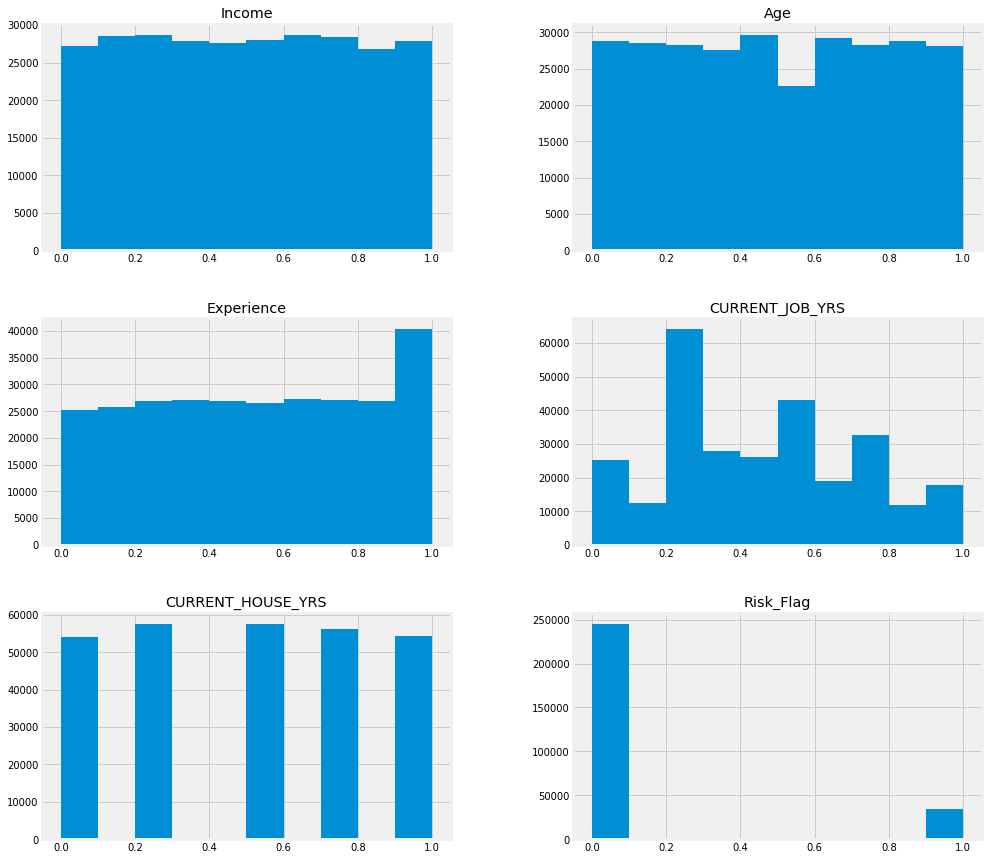

In [82]:
df.hist(figsize=(15,15))
plt.show()

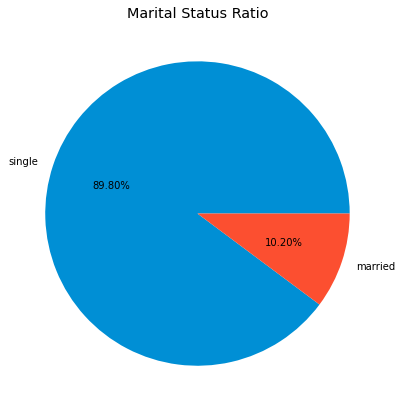

single     251442
married     28558
Name: Married/Single, dtype: int64

In [50]:
plt.figure(figsize=(7,7))
df['Married/Single'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title("Marital Status Ratio")
plt.ylabel("")
plt.show()
df['Married/Single'].value_counts()

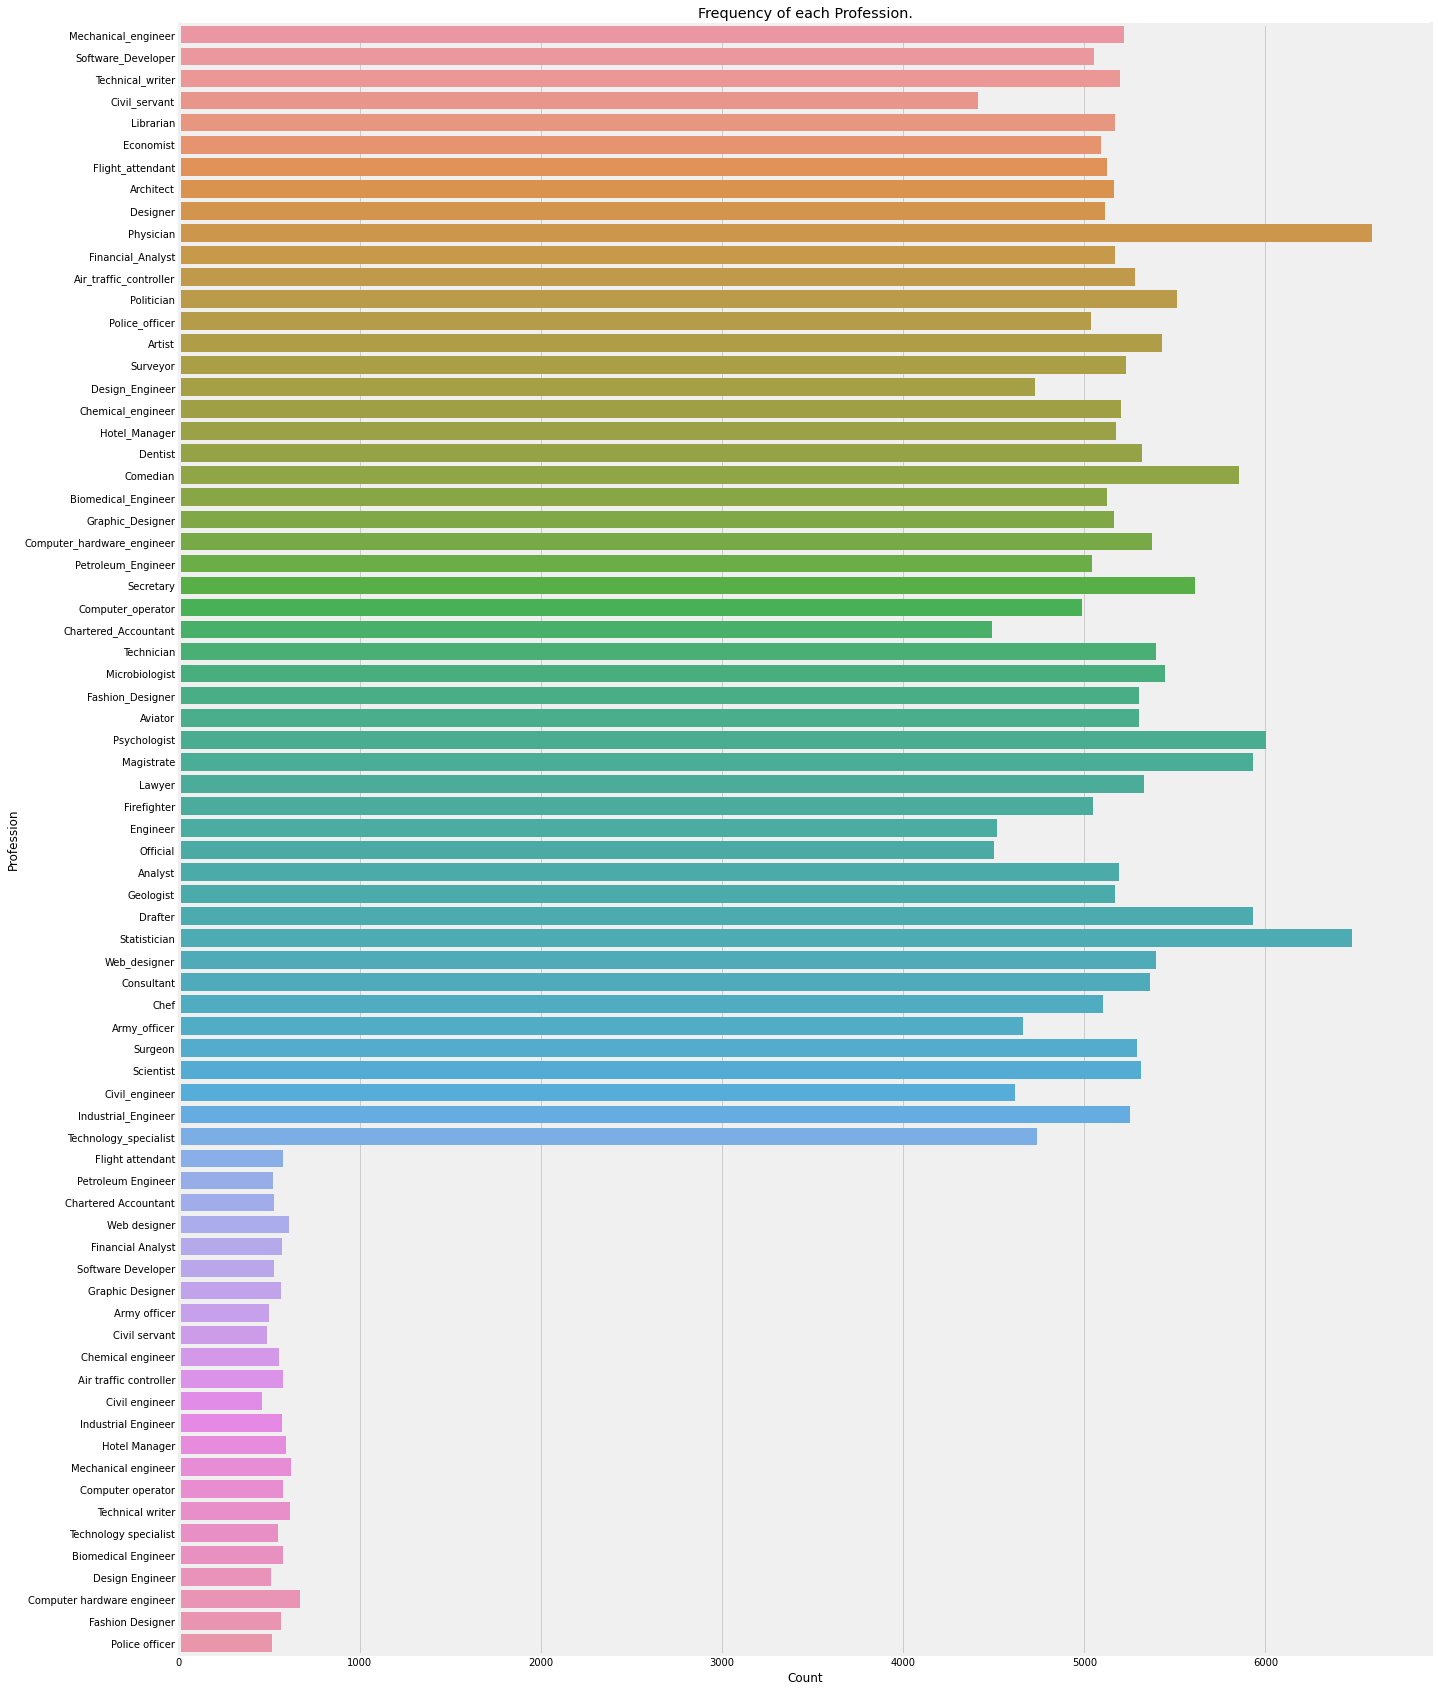

In [51]:
#Different Professions
plt.figure(figsize=(20,30))
sns.countplot(y=df['Profession'])
plt.title("Frequency of each Profession.")
plt.ylabel("Profession")
plt.xlabel("Count")
plt.show()

In [14]:
professions = df.groupby('Profession')
professions_list = df['Profession'].unique()
professions_list

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist',
       'Flight attendant', 'Petroleum Engineer', 'Chartered Accou

In [15]:
#Average Income,Age and Experience in Each Profession
avg_incomes = []
avg_age = []
avg_exp = []

In [16]:
for profession in professions_list:
    p_age_mean = professions.get_group(profession)['Age'].mean()
    p_income_mean = professions.get_group(profession)['Income'].mean()
    p_exp_mean = professions.get_group(profession)['Experience'].mean()
    
    avg_incomes.append(p_income_mean)
    avg_age.append(p_age_mean)
    avg_exp.append(p_exp_mean)


In [17]:
pdf = pd.DataFrame({
    'Profession':professions_list,
    'Average Age':avg_age,
    'Average Income':avg_incomes,
    'Average Experience':avg_exp,
})

pdf.head(30)

,Profession,Average Age,Average Income,Average Experience
0,Mechanical_engineer,49.368986,5.175032e+06,9.526548
1,Software_Developer,50.060558,4.891296e+06,10.074807
2,Technical_writer,50.406352,4.922266e+06,9.887777
3,Civil_servant,52.756175,4.947843e+06,9.993429
4,Librarian,47.802245,5.010869e+06,9.074303
5,Economist,51.126130,4.899803e+06,10.138900
6,Flight_attendant,48.058892,4.592177e+06,9.871100
7,Architect,48.524003,5.021720e+06,10.498064
8,Designer,50.006255,5.329547e+06,9.142103
9,Physician,50.415971,4.785188e+06,10.733262


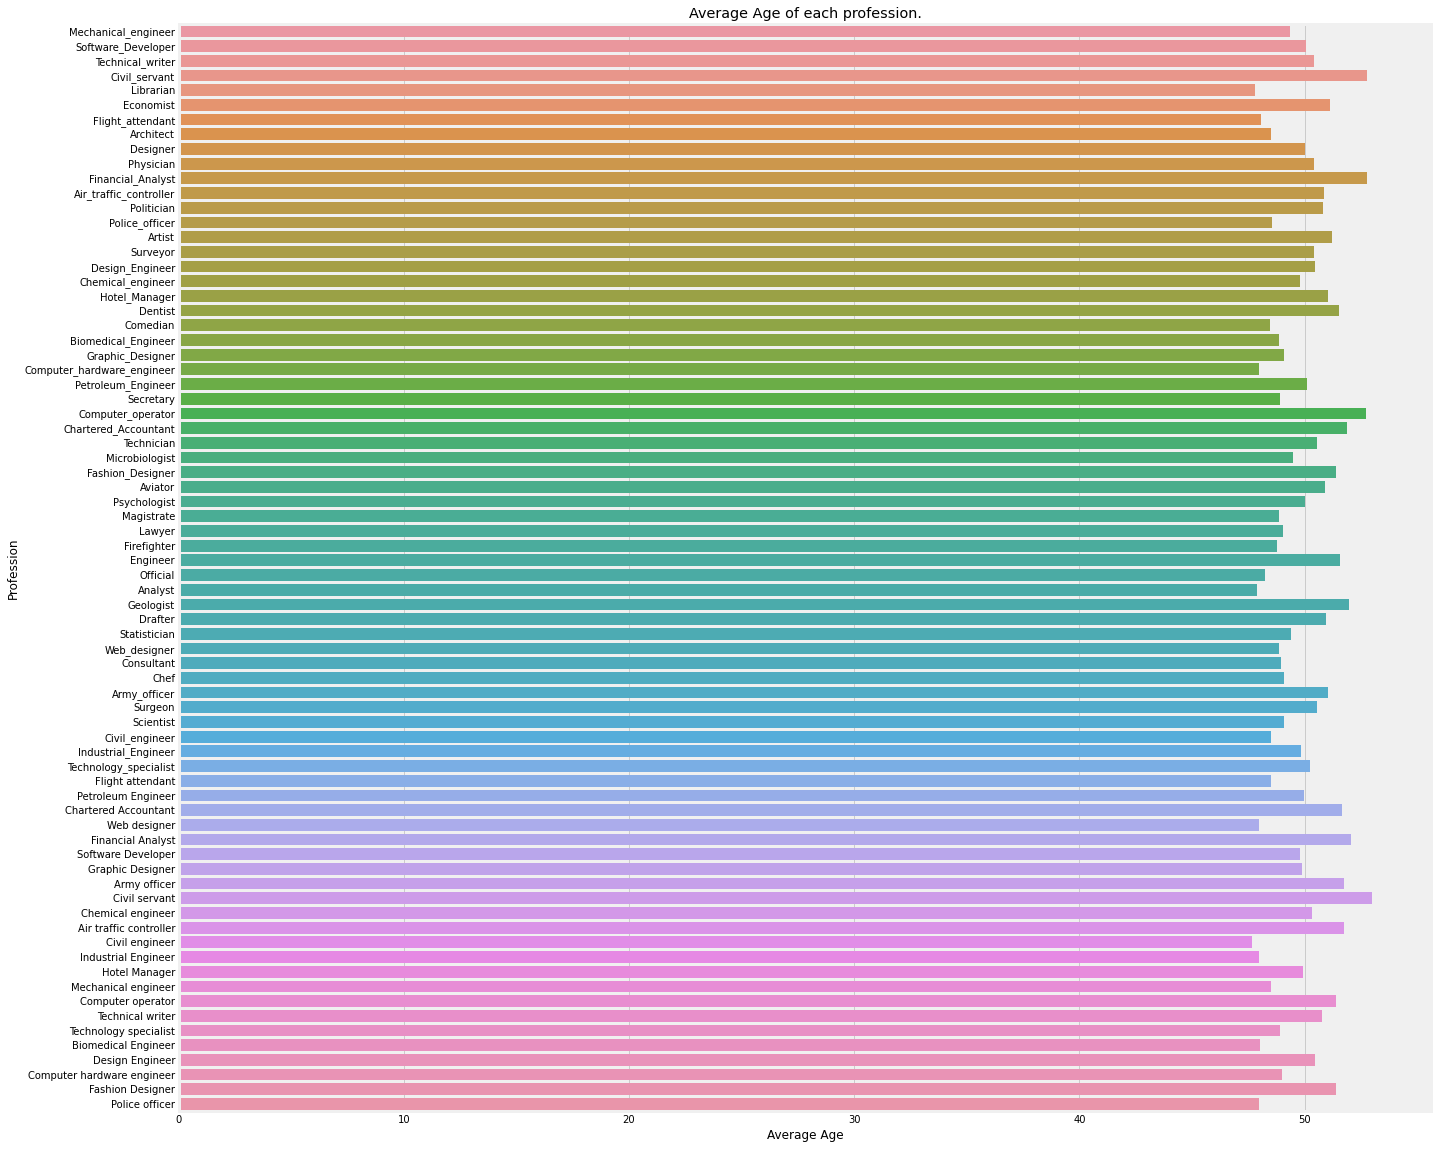

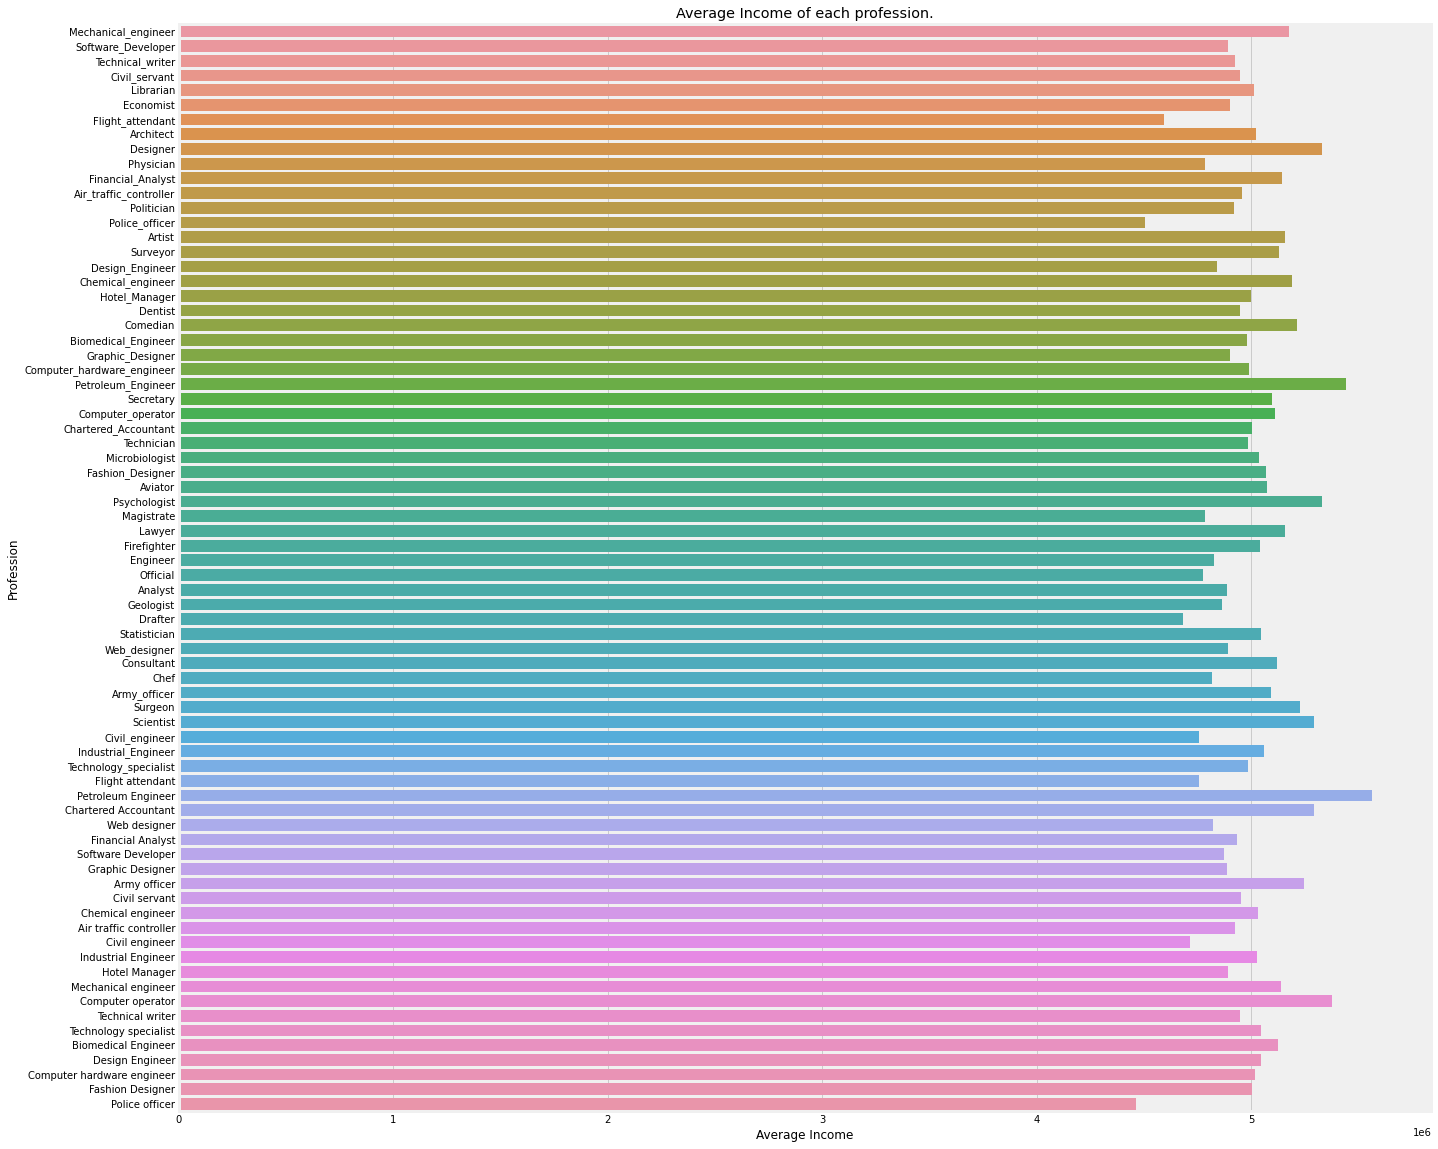

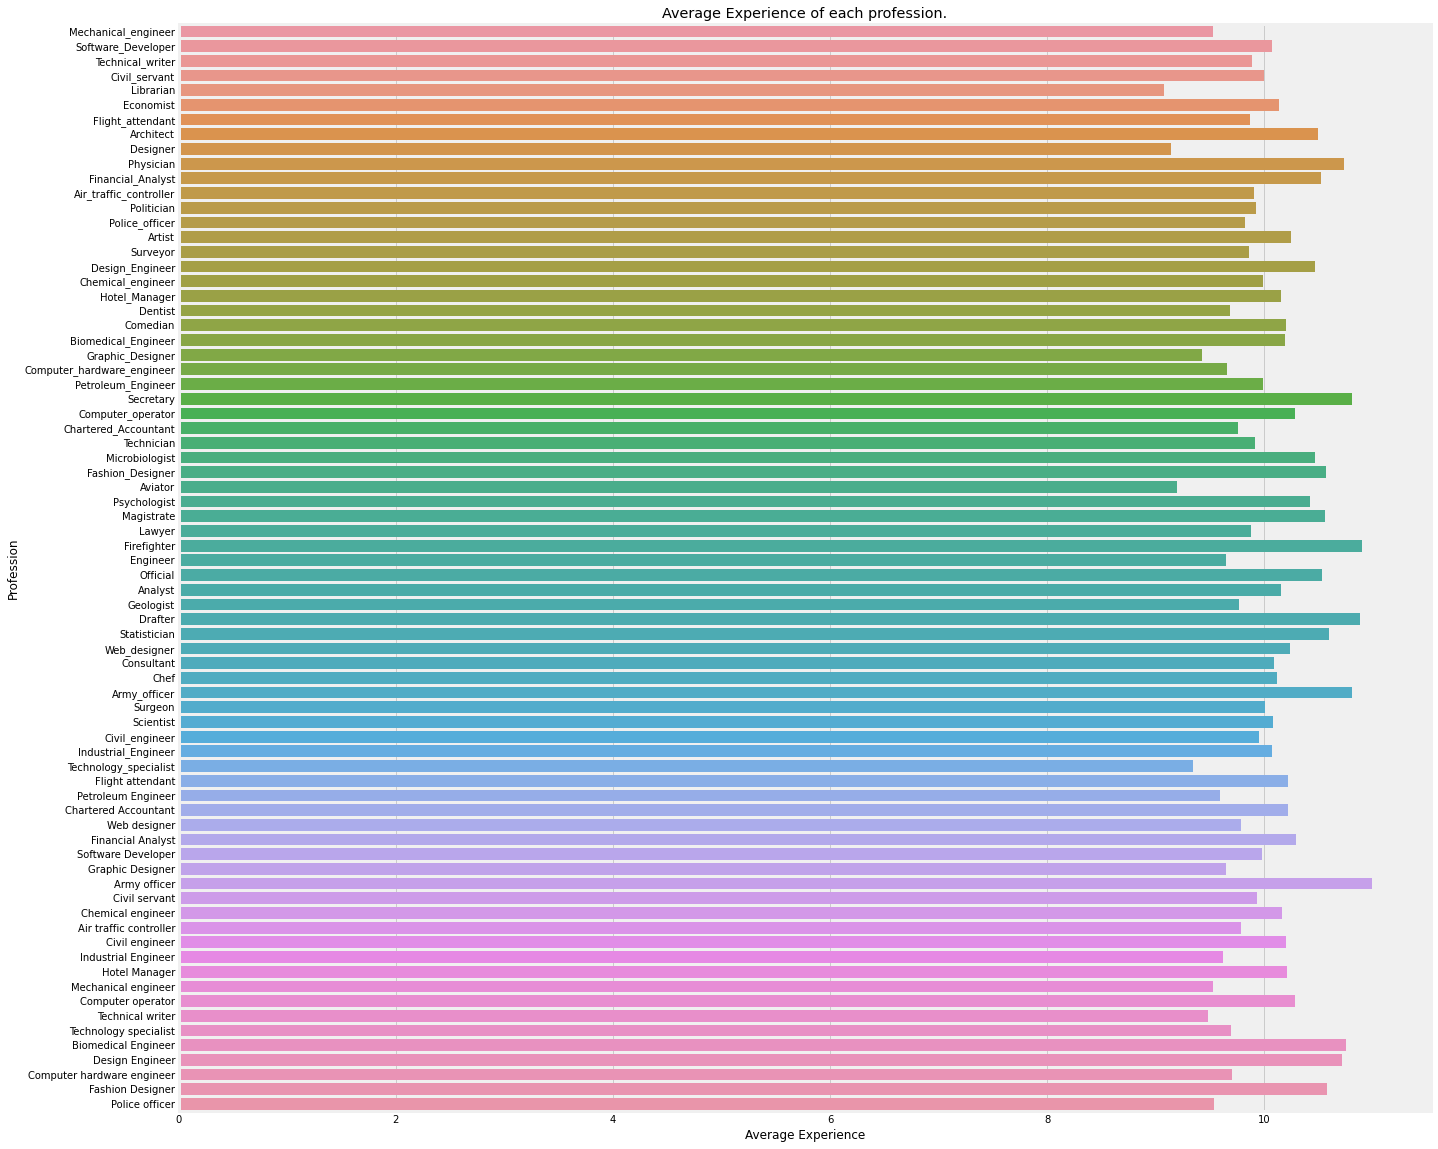

In [19]:
for col in pdf.columns[1:]:
    plt.figure(figsize=(20,20))
    sns.barplot(y=pdf['Profession'], x=pdf[col])
    plt.title(f"{col} of each profession.")
    plt.show()

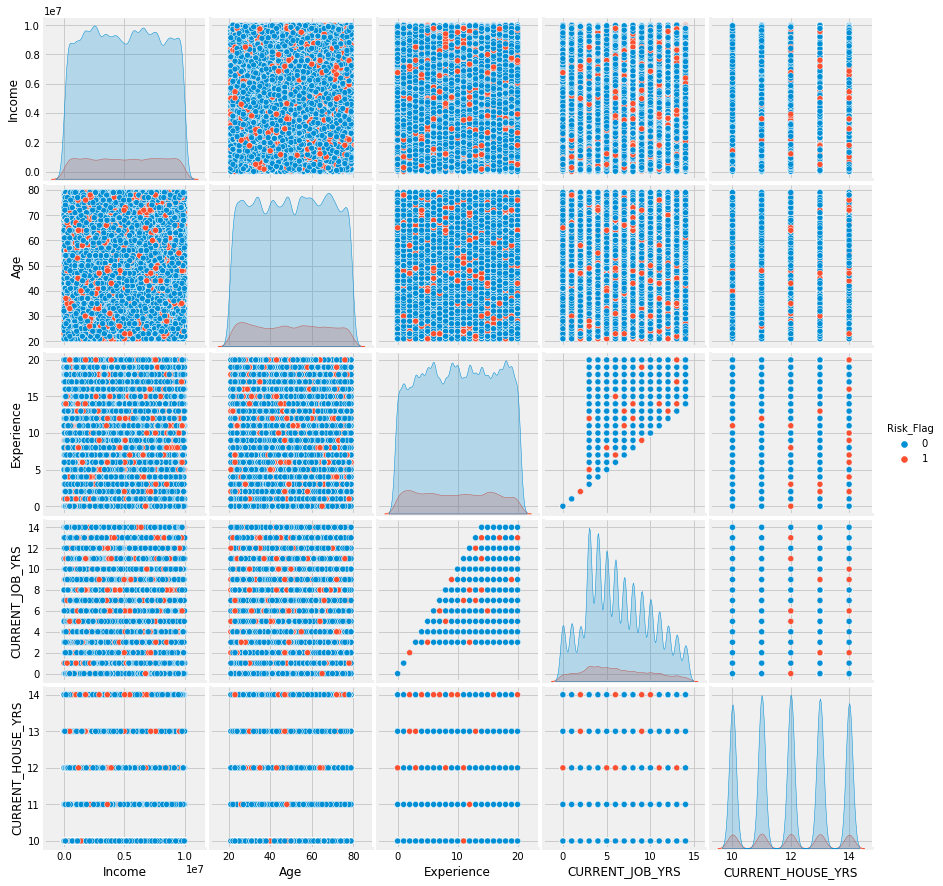

In [21]:
sns.pairplot(df,hue='Risk_Flag')

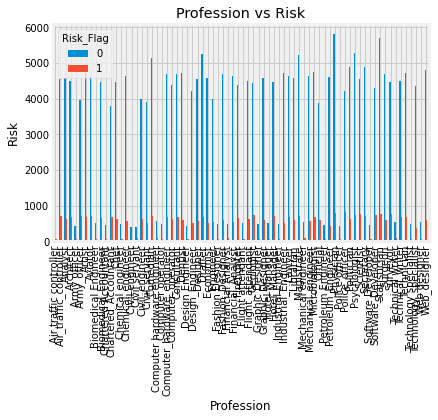

In [52]:
pd.crosstab(df.Profession,df.Risk_Flag).plot(kind='bar')
plt.title('Profession vs Risk')
plt.xlabel('Profession')
plt.ylabel('Risk')
plt.savefig('Profession vs Risk')

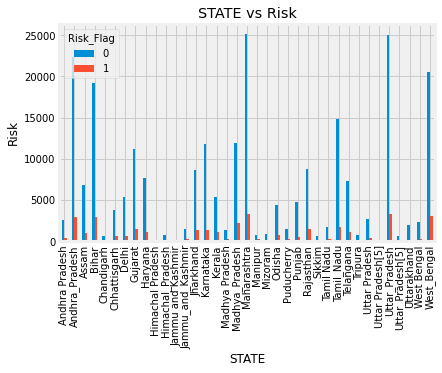

In [53]:
pd.crosstab(df.STATE,df.Risk_Flag).plot(kind='bar')
plt.title('STATE vs Risk')
plt.xlabel('STATE')
plt.ylabel('Risk')
plt.savefig('STATE vs Risk')

In [25]:
df['Risk_Flag'].value_counts()

0    245411
1     34589
Name: Risk_Flag, dtype: int64

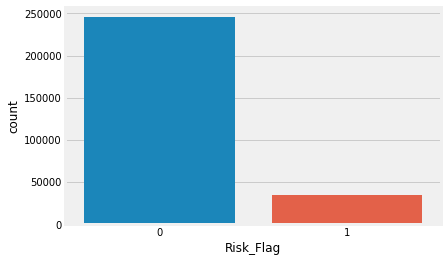

In [26]:
sns.countplot(x='Risk_Flag',data=df,)

In [27]:
count_no_risk = len(df[df['Risk_Flag']==0])
count_risk = len(df[df['Risk_Flag']==1])
pct_of_no_risk = count_no_risk/(count_no_risk+count_risk)
print("percentage of No Risk Flag", pct_of_no_risk*100)
pct_of_risk = count_risk/(count_no_risk+count_risk)
print("percentage of Risk", pct_of_risk*100)

percentage of No Risk Flag 87.64678571428571
percentage of Risk 12.353214285714285


Feature Modifications

Coverting Categorical

In [54]:
cols_to_encode = ['Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'STATE']
dummies = pd.get_dummies(df[cols_to_encode], drop_first=True)
dummies.shape


(280000, 113)

Scaling

In [55]:
df.drop(cols_to_encode, axis=1, inplace=True)
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


In [56]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df.drop('Risk_Flag',axis=1))

In [57]:
i = 0
for col in df.columns[:-1]:
    df[col] = scalled[:,i]
    i += 1

df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,0.214286,0.75,0
1,0.757206,0.327586,0.50,0.642857,0.75,0
2,0.398564,0.775862,0.20,0.285714,0.00,0
3,0.625263,0.344828,0.10,0.142857,0.50,1
4,0.576454,0.448276,0.55,0.214286,1.00,1


In [58]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000
mean,0.499523,0.499382,0.504402,0.452458,0.499298,0.123532
std,0.287997,0.294318,0.300253,0.260490,0.349727,0.329048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249901,0.241379,0.250000,0.214286,0.250000,0.000000
50%,0.499818,0.500000,0.500000,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
dummies.head()

,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,...,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal Pradesh,STATE_Himachal_Pradesh,STATE_Jammu and Kashmir,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya Pradesh,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttar Pradesh[5],STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West Bengal,STATE_West_Bengal
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [60]:
ndf = pd.concat([dummies,df], axis=1)
ndf.shape

(280000, 119)

Feature Selection

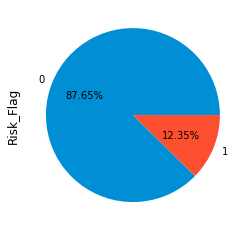

In [61]:
ndf['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

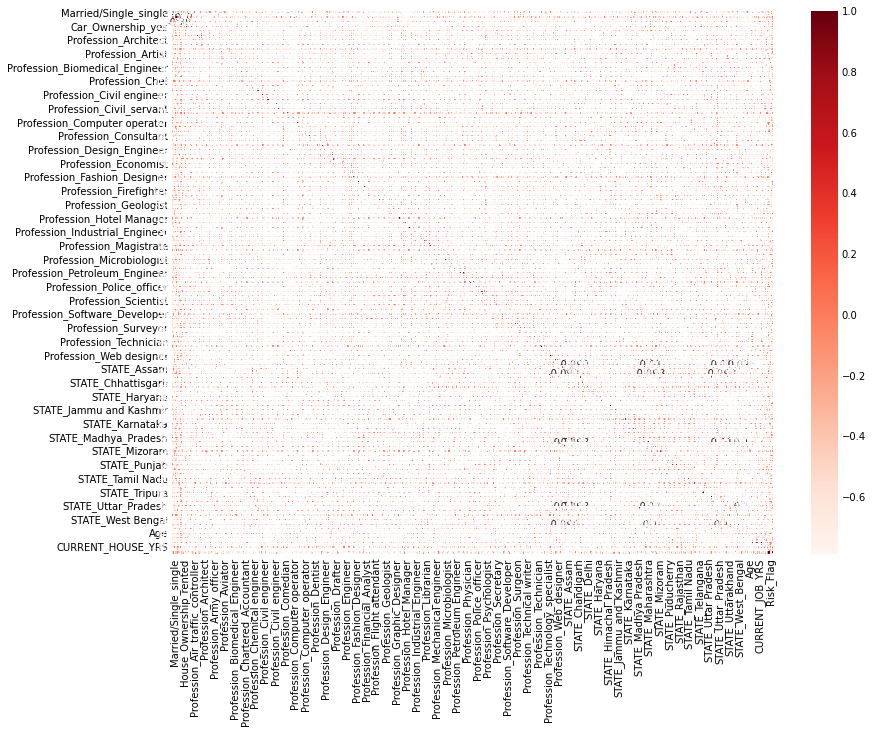

In [62]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = ndf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [63]:
#Correlation with output variable
cor_target = abs(cor["Risk_Flag"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

Risk_Flag    1.0
Name: Risk_Flag, dtype: float64

In [64]:
ndf.corr()

,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,...,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal Pradesh,STATE_Himachal_Pradesh,STATE_Jammu and Kashmir,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya Pradesh,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttar Pradesh[5],STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West Bengal,STATE_West_Bengal,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Married/Single_single,1.000000,0.022928,-0.024809,0.001508,-0.000380,0.001264,0.003323,-0.000531,0.001696,0.003904,-0.022337,0.003108,0.011963,0.001048,0.002466,-0.000311,0.004937,0.007677,-0.002614,0.003381,-0.002892,0.008726,0.010668,0.000854,-0.002149,0.001712,-0.003662,0.009642,-0.001245,0.001638,0.004334,-0.023984,-0.002703,-0.010411,0.019823,-0.000098,0.008654,-0.004354,-0.007453,0.000768,...,0.003284,-0.012850,0.003997,0.007502,-0.009404,-0.005337,0.001193,-0.000009,0.004012,0.013296,0.013096,-0.005717,0.005743,0.009358,0.019323,0.014613,0.018265,-0.015448,-0.007374,0.010283,0.003987,-0.011968,0.013002,0.005203,0.009744,0.003437,-0.009402,-0.006058,-0.003760,-0.012134,-0.018860,0.014630,-0.006226,-0.020218,0.003311,-0.005454,-0.001853,0.004344,-0.006699,0.018572
House_Ownership_owned,0.022928,1.000000,-0.790088,0.002873,-0.007694,-0.008406,0.026754,0.001275,0.006730,0.006327,0.024263,-0.000578,-0.001295,0.000352,0.002548,-0.010958,0.000204,0.003032,0.001749,0.001120,0.013161,0.004794,0.001344,-0.002130,0.001961,-0.006999,-0.000331,-0.014159,-0.004106,0.001870,0.006621,-0.002438,-0.007083,-0.006647,-0.008925,0.004349,0.009174,0.008498,0.020848,-0.022230,...,-0.015111,0.003495,0.003066,0.015566,0.003483,-0.001897,0.002397,0.000094,-0.006151,-0.016347,0.004632,0.010263,-0.016813,0.004378,0.010314,-0.002731,0.000060,-0.011448,-0.002990,-0.006713,0.015965,-0.004013,0.006347,-0.002684,-0.010059,0.015862,0.010985,0.000562,0.000104,-0.000177,0.003125,-0.002859,0.008477,0.017745,0.001319,0.018490,0.014643,0.007745,0.016225,-0.019613
House_Ownership_rented,-0.024809,-0.790088,1.000000,-0.002272,0.005483,0.007665,-0.022314,-0.005027,-0.011428,0.003276,-0.015061,-0.001445,-0.009025,0.002142,-0.002542,0.013054,-0.002315,-0.007669,0.000231,-0.001572,-0.011440,-0.003981,-0.006415,-0.000940,-0.002077,0.002095,-0.005647,0.016272,0.004507,-0.000145,-0.004855,0.001714,0.014784,0.010104,0.013888,-0.003236,-0.008867,-0.010650,-0.020834,0.025965,...,0.007209,-0.008949,-0.004518,-0.020944,-0.009138,-0.001276,-0.000114,0.003956,0.006788,0.013901,0.002435,-0.010239,0.009723,-0.001392,-0.003161,0.010966,0.004716,-0.003431,0.002744,0.012034,-0.007906,0.006293,-0.012618,0.003252,0.004134,-0.013206,-0.014012,0.001719,-0.001560,0.002471,-0.007137,-0.008327,-0.005580,-0.013040,0.010631,-0.013892,-0.011756,-0.

In [65]:
ndf.columns

Index(['Married/Single_single', 'House_Ownership_owned',
       'House_Ownership_rented', 'Car_Ownership_yes',
       'Profession_Air_traffic_controller', 'Profession_Analyst',
       'Profession_Architect', 'Profession_Army officer',
       'Profession_Army_officer', 'Profession_Artist',
       ...
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West Bengal',
       'STATE_West_Bengal', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object', length=119)

In [66]:
df.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

In [67]:
dummies.columns

Index(['Married/Single_single', 'House_Ownership_owned',
       'House_Ownership_rented', 'Car_Ownership_yes',
       'Profession_Air_traffic_controller', 'Profession_Analyst',
       'Profession_Architect', 'Profession_Army officer',
       'Profession_Army_officer', 'Profession_Artist',
       ...
       'STATE_Tamil_Nadu', 'STATE_Telangana', 'STATE_Tripura',
       'STATE_Uttar Pradesh', 'STATE_Uttar Pradesh[5]', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West Bengal',
       'STATE_West_Bengal'],
      dtype='object', length=113)

## LOGISTIC REGRESSION

In [145]:
ndf = pd.concat([dummies,df], axis=1)
ndf.shape

(280000, 119)

In [146]:
y = ndf['Risk_Flag']
x= ndf.drop('Risk_Flag',axis=1)
x.shape, y.shape

((280000, 118), (280000,))

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=0,shuffle=True)

In [148]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

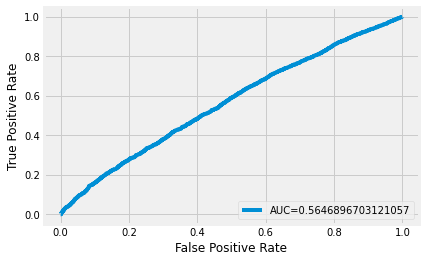

In [149]:
#define metrics
y_pred=log_regression.predict(x_test)
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[73603     0]
 [10397     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     73603
           1       0.00      0.00      0.00     10397

    accuracy                           0.88     84000
   macro avg       0.44      0.50      0.47     84000
weighted avg       0.77      0.88      0.82     84000



In [144]:
cl = LogisticRegression()

print('5-fold Stratified KFold cross validation:\n')
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
# default cv used StratifiedKFold for int
labels = ['LogisticRegression']

for i,(cl, label) in enumerate(zip([cl],labels)):
    s= cross_val_score(cl,x,y, cv=5);
    results=np.average(s) ;
    print(label," : ",results)

5-fold Stratified KFold cross validation:

LogisticRegression  :  0.876467857142857


## RANDOM FOREST

In [94]:
ndf = pd.concat([dummies,df], axis=1)
ndf.shape

(280000, 119)

In [95]:
y = ndf['Risk_Flag']
x= ndf.drop('Risk_Flag',axis=1)
x.shape, y.shape

((280000, 118), (280000,))

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=0,shuffle=True)

In [70]:


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[70141  3462]
 [ 5588  4809]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     73603
           1       0.58      0.46      0.52     10397

    accuracy                           0.89     84000
   macro avg       0.75      0.71      0.73     84000
weighted avg       0.88      0.89      0.89     84000



Under Smapling

In [151]:
ndf = pd.concat([dummies,df], axis=1)
ndf.shape

(280000, 119)

In [152]:
ndf['Risk_Flag'].value_counts()

0    245411
1     34589
Name: Risk_Flag, dtype: int64

In [153]:
class0 = ndf[ndf['Risk_Flag'] == 0].sample(34589)
class0.shape

(34589, 119)

In [154]:
class1 = ndf[ndf['Risk_Flag'] == 1]
class1.shape

(34589, 119)

In [155]:
ndf2 = pd.concat([class0,class1], axis=0) 
ndf2.shape

(69178, 119)

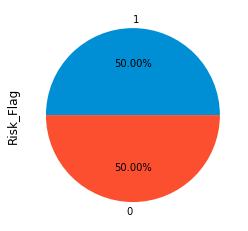

In [156]:
ndf2['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

In [157]:
x, y = ndf2.drop('Risk_Flag',axis=1),ndf2['Risk_Flag']
x.shape, y.shape

((69178, 118), (69178,))

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((51883, 118), (17295, 118), (51883,), (17295,))

Logistic Regression after Under-Smapling

In [159]:
cl = LogisticRegression()

print('5-fold Stratified KFold cross validation:\n')
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
# default cv used StratifiedKFold for int
labels = ['LogisticRegression']

for i,(cl, label) in enumerate(zip([cl],labels)):
    s= cross_val_score(cl,x,y, cv=5);
    results=np.average(s) ;
    print(label," : ",results)

5-fold Stratified KFold cross validation:

LogisticRegression  :  0.5162320446872459


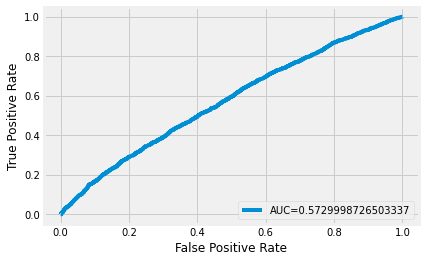

In [160]:
y_pred=log_regression.predict(x_test)
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Random Forest Afer Under Sampling

In [161]:

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [166]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7518 1223]
 [2023 6531]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8741
           1       0.84      0.76      0.80      8554

    accuracy                           0.81     17295
   macro avg       0.82      0.81      0.81     17295
weighted avg       0.81      0.81      0.81     17295



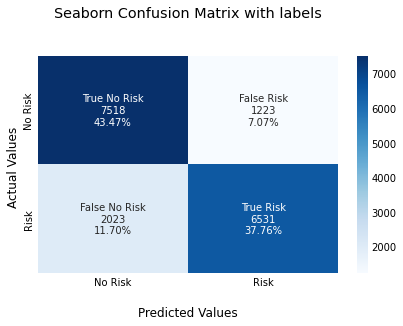

In [173]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True No Risk','False Risk','False No Risk','True Risk']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Risk','Risk'])
ax.yaxis.set_ticklabels(['No Risk','Risk'])

## Display the visualization of the Confusion Matrix.
plt.show()

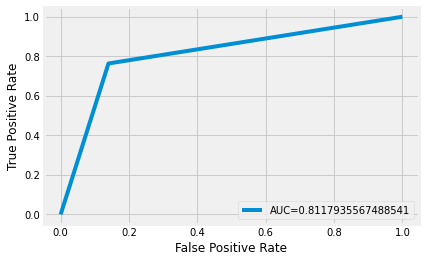

In [163]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()